In [2]:
import time
import logging
from sklearn.datasets import fetch_olivetti_faces

In [3]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

data_home = 'datasets/'
logging.info('start to load dataset')
faces = fetch_olivetti_faces(data_home=data_home)
logging.info('done with load dataset')

2020-09-22 23:24:09,964 start to load dataset
2020-09-22 23:24:10,049 done with load dataset


In [4]:
import numpy as np
X = faces.data
y = faces.target
targets = np.unique(faces.target)
target_names = np.array(['c%d' % t for t in targets])
n_targets = target_names.shape[0]
n_samples, h, w = faces.images.shape
n_samples, n_targets

(400, 40)

In [5]:
w, h, X.shape

(64, 64, (400, 4096))

In [6]:
import matplotlib.pyplot as plt
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(2*n_row, 2.2 * n_row), dpi=144)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,hspace=.01)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis('off')

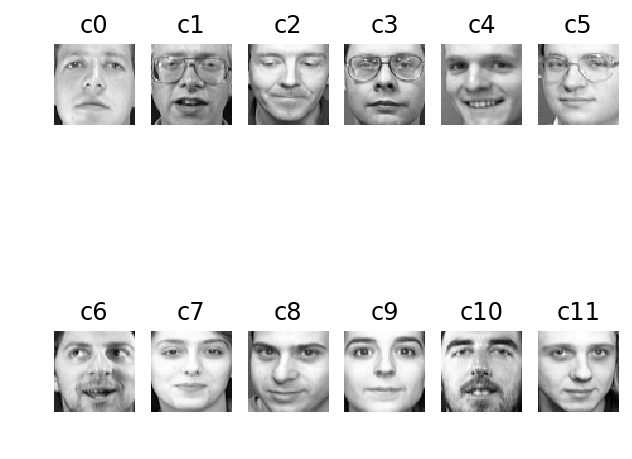

In [7]:
n_row=2
n_col = 6
sample_images = None
sample_titles = []
for i in range(n_targets):
    people_images = X[y==i]
    people_sample_index = np.random.randint(0, people_images.shape[0], 1)
    people_sample_image = people_images[people_sample_index, :]
    if sample_images is not None:
        sample_images = np.concatenate((sample_images, people_sample_image), axis=0)
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])
plot_gallery(sample_images, sample_titles, h, w, n_row, n_col)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [9]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

precision    recall  f1-score   support

          c0       0.00      0.00      0.00         1
          c1       0.00      0.00      0.00         3
          c2       0.00      0.00      0.00         2
          c3       0.00      0.00      0.00         1
          c4       0.00      0.00      0.00         1
          c5       0.00      0.00      0.00         1
          c6       0.00      0.00      0.00         4
          c7       0.00      0.00      0.00         2
          c8       0.00      0.00      0.00         4
          c9       0.00      0.00      0.00         2
         c10       0.00      0.00      0.00         1
         c11       0.00      0.00      0.00         0
         c12       0.00      0.00      0.00         4
         c13       0.00      0.00      0.00         4
         c14       0.00      0.00      0.00         1
         c15       0.00      0.00      0.00         1
         c16       0.00      0.00      0.00         3
         c17       0.00      0.00      0.

In [12]:
from sklearn.decomposition import PCA

candidate_components = range(10, 300, 30)
explained_ratios = []
for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(X)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))

([<matplotlib.axis.XTick at 0x180c5dc8860>,
 <a list of 15 Text xticklabel objects>)

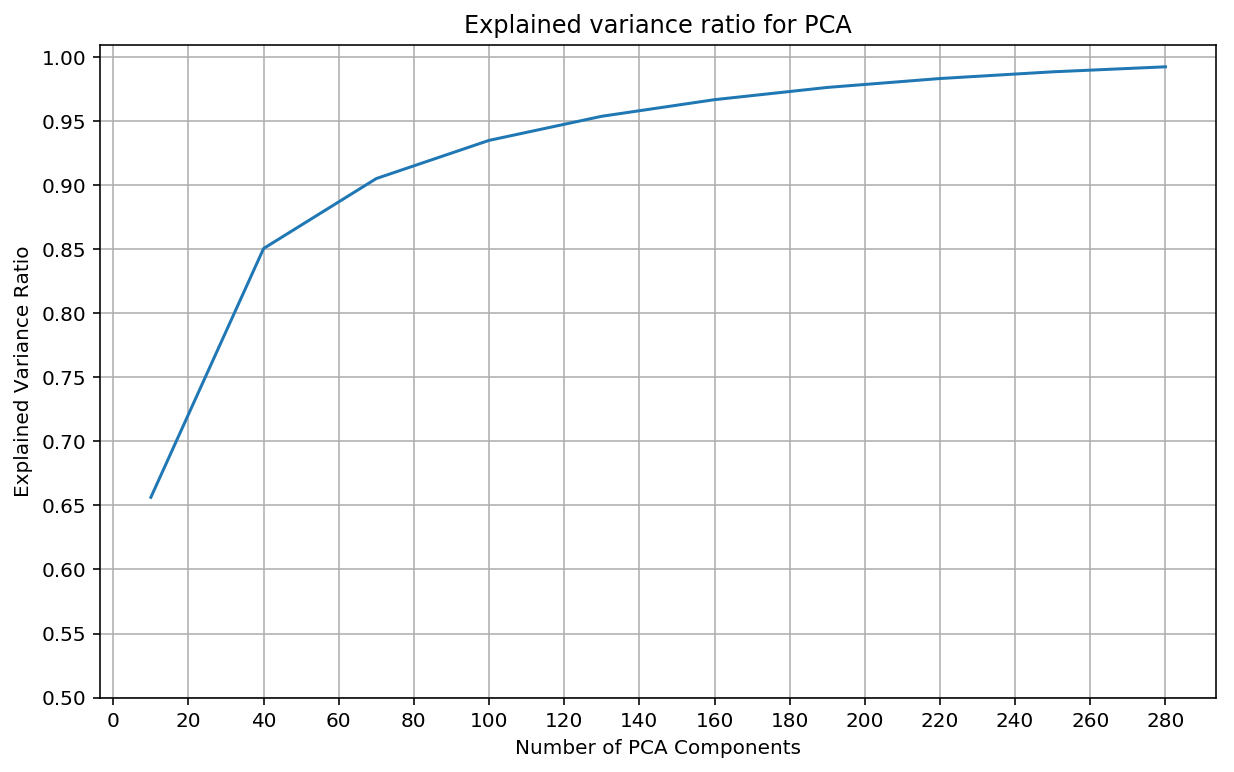

In [13]:
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5, 1.05, .05))
plt.xticks(np.arange(0, 300, 20))